In [1]:
#loading some stuff 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle

In [2]:
#setting system path
import sys
sys.path.append('c:/Users/tpiechowiak/Documents/BEAR/GNOS/sws_machine_learning/')
base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'

In [8]:
#now loading all the necessary data files
#now loading the pickle file containing the audiogram data
with open(base_path + "LatestSQLJson.pkl", "rb") as input_file:
    PAT = pickle.load(input_file)
print("Read Patient data from pickle file")

with open(base_path + "LatestRFTSetting.pkl", "rb") as input_file:
    RFT = pickle.load(input_file)
print("Read RFT from pickle file")

with open(base_path + 'hi_id_low_cluster.pkl','rb') as f:
    hi_id_low_cluster = pickle.load(f)
print("Read low usage cluster hi ids")

with open(base_path + 'Audigram_classes.pkl','rb') as f:
    audiogram_classes = pickle.load(f)
print("Read audiogram data from pickle file")

with open(base_path + 'Bass_states_per_hi.pkl','rb') as f:
    bass_states = pickle.load(f)
print("Read bass state data from pickle file")

with open(base_path + 'Env_use_per_hi.pkl','rb') as f:
    env = pickle.load(f)
print("Read environmental classifier data from pickle file")

with open(base_path + 'Inp_level_per_hi.pkl','rb') as f:
    inp_level = pickle.load(f)
print("Read input level distribution data from pickle file")

with open(base_path + 'rftsettings_blobs_reduced.pkl','rb') as f:
    rft_blob = pickle.load(f)
print("Read rft blobs distribution data from pickle file")



Read Patient data from pickle file
Read RFT from pickle file
Read low usage cluster hi ids
Read audiogram data from pickle file
Read bass state data from pickle file
Read environmental classifier data from pickle file
Read input level distribution data from pickle file
Read rft blobs distribution data from pickle file


In [9]:
#now merge in order to connect HearingInstrumentId to GnosHearingInstrumentId
df_1 = pd.merge(PAT['patienthimappings'],PAT['hearinginstruments'],\
                  on='GnosHearingInstrumentId',how='inner')


df_2 = pd.merge(df_1,PAT['patients'],on='PatientId',\
                    how='inner').drop(columns = ['CreatedDate_x',\
                                                 'ModifiedDate_x','CreatedDate_y','ModifiedDate_y'])

In [10]:
#now merge audiogram data to it 
df_3 = pd.merge(audiogram_classes, df_2, on = 'HearingInstrumentId',how = 'inner')
df_4 = pd.merge(rft_blob[['HearingInstrumentId','DeviceId']],df_3, on='HearingInstrumentId',\
               how='inner')

In [11]:
new_df = df_4[['PatientId',
               'HearingInstrumentId',
               'FirmwareVersion',
               'CountryCode',
               'Earside',
               'StateCode',
               'BrandName',
               'Gender',
               'YearOfBirth',
               'UserExperienceLevel',
               'AudClass',
               'DeviceId'
               ]]

In [12]:
new_df[new_df['PatientId']=='955DDFCEB78ABC687F91664260B94E3341BC177A728EB7A820D4F65878BBA24D']

,PatientId,HearingInstrumentId,FirmwareVersion,CountryCode,Earside,StateCode,BrandName,Gender,YearOfBirth,UserExperienceLevel,AudClass,DeviceId
3287402,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0
3287403,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0
3287404,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0
3287405,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0
4600945,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,1,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0
4600946,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,1,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0


In [13]:
new_df['Cluster_class'] = 0 
new_df.loc[new_df['HearingInstrumentId'].isin(hi_id_low_cluster), 'Cluster_class'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
new_df[new_df['HearingInstrumentId'].isin(hi_id_low_cluster)]['Cluster_class']

4239       1
4240       1
4241       1
4242       1
4243       1
          ..
4731185    1
4731186    1
4731187    1
4731188    1
4749073    1
Name: Cluster_class, Length: 105896, dtype: int64

In [17]:
new_df[new_df['PatientId']=='955DDFCEB78ABC687F91664260B94E3341BC177A728EB7A820D4F65878BBA24D']

,PatientId,HearingInstrumentId,FirmwareVersion,CountryCode,Earside,StateCode,BrandName,Gender,YearOfBirth,UserExperienceLevel,AudClass,DeviceId,Cluster_class
3287402,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1
3287403,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1
3287404,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1
3287405,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1
4600945,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,1,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0,0
4600946,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,1,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0,0


In [18]:
AsymLoss = []

cnt = 0
for pat_id, group in new_df.groupby('PatientId'):
    if(cnt%10000 == 0):
        print('Patient =',cnt)
    cnt = cnt + 1    
    
    #check for unilateral fitting => asymmetrical 
    if ((1 not in group['Earside'].values) | (2 not in group['Earside'].values)):        
        AsymLoss.append(pat_id)
        continue
    
    #check for asymmetric loss
    if (~(group[group['Earside'] == 1]['AudClass'].iloc[0]\
          == group[group['Earside'] == 2]['AudClass'].iloc[0])):
        AsymLoss.append(pat_id)           
      
     

Patient = 0
Patient = 10000
Patient = 20000
Patient = 30000
Patient = 40000
Patient = 50000
Patient = 60000


In [20]:
new_df['asym'] = 0
new_df.loc[new_df['PatientId'].isin(AsymLoss),'asym'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
new_df[new_df['PatientId']=='955DDFCEB78ABC687F91664260B94E3341BC177A728EB7A820D4F65878BBA24D']

,PatientId,HearingInstrumentId,FirmwareVersion,CountryCode,Earside,StateCode,BrandName,Gender,YearOfBirth,UserExperienceLevel,AudClass,DeviceId,Cluster_class,asym
3287402,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1
3287403,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1
3287404,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1
3287405,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1
4600945,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,1,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0,0,1
4600946,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,1,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0,0,1


In [22]:
#we need to make sure that Cluster_Class is 1 for each PatientId when only one devices is 1 
appended_df = []
patid = []
cnt = 0
for pat_id, group in new_df.groupby('PatientId'):
    if(cnt%1000 == 0):
        print('Patient ',cnt)
    if (np.any(group['Cluster_class'] == 1)):
        group['Cluster_class'] = 1
    
    patid.append(pat_id)
    appended_df.append(group) 
    cnt += 1

final_df = pd.concat(appended_df)

Patient  0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Patient  1000
Patient  2000
Patient  3000
Patient  4000
Patient  5000
Patient  6000
Patient  7000
Patient  8000
Patient  9000
Patient  10000
Patient  11000
Patient  12000
Patient  13000
Patient  14000
Patient  15000
Patient  16000
Patient  17000
Patient  18000
Patient  19000
Patient  20000
Patient  21000
Patient  22000
Patient  23000
Patient  24000
Patient  25000
Patient  26000
Patient  27000
Patient  28000
Patient  29000
Patient  30000
Patient  31000
Patient  32000
Patient  33000
Patient  34000
Patient  35000
Patient  36000
Patient  37000
Patient  38000
Patient  39000
Patient  40000
Patient  41000
Patient  42000
Patient  43000
Patient  44000
Patient  45000
Patient  46000
Patient  47000
Patient  48000
Patient  49000
Patient  50000
Patient  51000
Patient  52000
Patient  53000
Patient  54000
Patient  55000
Patient  56000
Patient  57000
Patient  58000
Patient  59000
Patient  60000
Patient  61000
Patient  62000
Patient  63000
Patient  64000
Patient  65000
Patient  66000
Patient  67000


In [23]:
final_df[final_df['PatientId']=='955DDFCEB78ABC687F91664260B94E3341BC177A728EB7A820D4F65878BBA24D']

,PatientId,HearingInstrumentId,FirmwareVersion,CountryCode,Earside,StateCode,BrandName,Gender,YearOfBirth,UserExperienceLevel,AudClass,DeviceId,Cluster_class,asym
3287402,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1
3287403,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1
3287404,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1
3287405,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,2,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1
4600945,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,1,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0,1,1
4600946,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,1,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0,1,1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


(array([1.83158308e-02, 3.43804414e-05, 5.22135484e-04, 7.36989949e-05,
        8.37988319e-04, 4.16292174e-04, 1.33981232e-04, 2.48955391e-04,
        1.65203145e-03, 8.48237231e-04, 4.01664181e-04, 1.12654178e-03,
        7.25529802e-04, 2.01400439e-03, 6.19686492e-04, 1.30645677e-03,
        4.31535101e-03, 1.28633164e-03, 5.38766673e-03, 2.77466001e-03,
        3.58069036e-03, 4.38187577e-03, 5.98918470e-03, 4.61154457e-03,
        7.24178809e-03, 7.22799865e-03, 7.13184522e-03, 8.32640251e-03,
        1.21728192e-02, 7.68519330e-03, 8.51013755e-03, 2.59331017e-02,
        1.28985354e-02, 9.25271781e-03, 1.06498309e-02, 1.06119099e-02,
        1.19691454e-02, 6.98677653e-03, 6.12633377e-03, 2.30115189e-01]),
 array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  , 12.25, 14.5 , 16.75, 19.  ,
        21.25, 23.5 , 25.75, 28.  , 30.25, 32.5 , 34.75, 37.  , 39.25,
        41.5 , 43.75, 46.  , 48.25, 50.5 , 52.75, 55.  , 57.25, 59.5 ,
        61.75, 64.  , 66.25, 68.5 , 70.75, 73.  , 75.25, 77.5 , 7

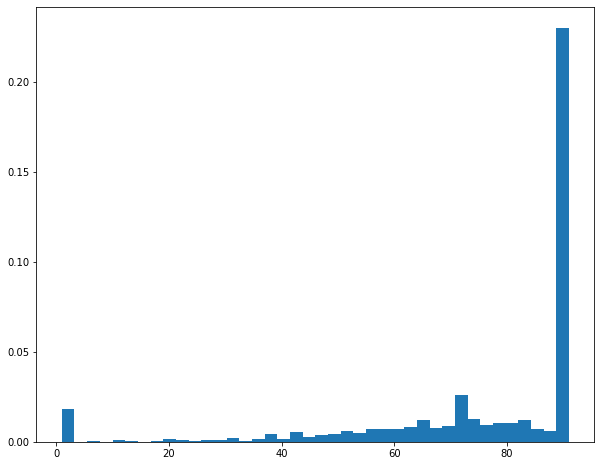

In [24]:
#now create age groups
final_df['Age'] = pd.datetime.now().year - final_df['YearOfBirth']
final_df = final_df[final_df['Age'] > 0]
plt.figure(figsize=(10,8))
plt.hist(final_df['Age'],bins = 40, density=True)

In [26]:
#now make age groups 
final_df['AgeGroup'] = ''
final_df.loc[((final_df['Age'] > 0) & (final_df['Age'] <= 20)),'AgeGroup' ] = 'Very Young'
final_df.loc[((final_df['Age'] > 20) & (final_df['Age'] <= 40)),'AgeGroup' ] = 'Young'
final_df.loc[((final_df['Age'] > 40) & (final_df['Age'] <= 60)),'AgeGroup' ] = 'Middle age'
final_df.loc[((final_df['Age'] > 60) & (final_df['Age'] <= 80)),'AgeGroup' ] = 'Old'
final_df.loc[((final_df['Age'] > 80) & ~(final_df['Age'] == 91)),'AgeGroup' ] = 'Very old'
#take out the odd 91 years domain 
final_df.loc[(final_df['Age'] == 91),'AgeGroup' ] = 'Odd'


In [27]:
#substitute code for left, right
final_df.loc[final_df['Earside'] == 1,'Earside'] = 'left'
final_df.loc[final_df['Earside'] == 2, 'Earside'] = 'right'

In [28]:
final_df[final_df['PatientId']=='955DDFCEB78ABC687F91664260B94E3341BC177A728EB7A820D4F65878BBA24D']

,PatientId,HearingInstrumentId,FirmwareVersion,CountryCode,Earside,StateCode,BrandName,Gender,YearOfBirth,UserExperienceLevel,AudClass,DeviceId,Cluster_class,asym,Age,AgeGroup
3287402,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,right,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1,2,Very Young
3287403,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,right,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1,2,Very Young
3287404,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,right,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1,2,Very Young
3287405,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,L674P674C40,US,right,KS,ReSound,1,2018,3,N2,RS.P6.Top.LxRIE312DW.4.0,1,1,2,Very Young
4600945,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,left,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0,1,1,2,Very Young
4600946,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,L674P674C40,US,left,KS,ReSound,1,2018,3,N3,RS.P6.Top.LxRIE312DW.4.0,1,1,2,Very Young


In [35]:
#now extract formfactor information from the dataframe
final_df['Formfactor'] = 'Other'
final_df.loc[final_df['DeviceId'].str.contains('ITE'),'Formfactor'] = 'ITE'
final_df.loc[final_df['DeviceId'].str.contains('BTE'),'Formfactor'] = 'BTE'
final_df.loc[final_df['DeviceId'].str.contains('ITC'),'Formfactor'] = 'ITC'
final_df.loc[final_df['DeviceId'].str.contains('CIC'),'Formfactor'] = 'CIC'
final_df.loc[final_df['DeviceId'].str.contains('RIE'),'Formfactor'] = 'RIE'

In [40]:
final_df.drop(columns= ['FirmwareVersion','DeviceId'], inplace=True)

In [41]:
final_df.keys()

Index(['PatientId', 'HearingInstrumentId', 'CountryCode', 'Earside',
       'StateCode', 'BrandName', 'Gender', 'YearOfBirth',
       'UserExperienceLevel', 'AudClass', 'Cluster_class', 'asym', 'Age',
       'AgeGroup', 'Formfactor'],
      dtype='object')

In [45]:
#now make one-hot-encoding
OHC_enc = pd.get_dummies(final_df, columns=['CountryCode','BrandName',\
                                       'AudClass','Gender','AgeGroup','Formfactor','Earside'])

In [46]:
OHC_enc = OHC_enc.loc[:,~OHC_enc.columns.duplicated()]

In [47]:
OHC_enc.keys()

Index(['PatientId', 'HearingInstrumentId', 'StateCode', 'YearOfBirth',
       'UserExperienceLevel', 'Cluster_class', 'asym', 'Age', 'CountryCode_AR',
       'CountryCode_AT', 'CountryCode_AU', 'CountryCode_BE', 'CountryCode_BG',
       'CountryCode_BR', 'CountryCode_CA', 'CountryCode_CH', 'CountryCode_CL',
       'CountryCode_CO', 'CountryCode_CR', 'CountryCode_CY', 'CountryCode_CZ',
       'CountryCode_DE', 'CountryCode_DK', 'CountryCode_EC', 'CountryCode_ES',
       'CountryCode_FI', 'CountryCode_FR', 'CountryCode_GB', 'CountryCode_GR',
       'CountryCode_HK', 'CountryCode_HU', 'CountryCode_ID', 'CountryCode_IE',
       'CountryCode_IL', 'CountryCode_IN', 'CountryCode_IS', 'CountryCode_IT',
       'CountryCode_JP', 'CountryCode_KR', 'CountryCode_KW', 'CountryCode_LB',
       'CountryCode_MX', 'CountryCode_MY', 'CountryCode_NL', 'CountryCode_NO',
       'CountryCode_NZ', 'CountryCode_PE', 'CountryCode_PL', 'CountryCode_PT',
       'CountryCode_RU', 'CountryCode_SE', 'CountryCode_SG'

In [48]:
OHC_enc[OHC_enc['PatientId']=='955DDFCEB78ABC687F91664260B94E3341BC177A728EB7A820D4F65878BBA24D']

,PatientId,HearingInstrumentId,StateCode,YearOfBirth,UserExperienceLevel,Cluster_class,asym,Age,CountryCode_AR,CountryCode_AT,...,AgeGroup_Very Young,AgeGroup_Very old,AgeGroup_Young,Formfactor_BTE,Formfactor_CIC,Formfactor_ITC,Formfactor_ITE,Formfactor_RIE,Earside_left,Earside_right
3287402,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,KS,2018,3,1,1,2,0,0,...,1,0,0,0,0,0,0,1,0,1
3287403,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,KS,2018,3,1,1,2,0,0,...,1,0,0,0,0,0,0,1,0,1
3287404,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,KS,2018,3,1,1,2,0,0,...,1,0,0,0,0,0,0,1,0,1
3287405,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,KS,2018,3,1,1,2,0,0,...,1,0,0,0,0,0,0,1,0,1
4600945,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,KS,2018,3,1,1,2,0,0,...,1,0,0,0,0,0,0,1,1,0
4600946,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,KS,2018,3,1,1,2,0,0,...,1,0,0,0,0,0,0,1,1,0


In [49]:
OHC_enc.drop_duplicates(subset=['PatientId','HearingInstrumentId'], inplace=True)

In [50]:
OHC_enc[OHC_enc['PatientId']=='955DDFCEB78ABC687F91664260B94E3341BC177A728EB7A820D4F65878BBA24D']

,PatientId,HearingInstrumentId,StateCode,YearOfBirth,UserExperienceLevel,Cluster_class,asym,Age,CountryCode_AR,CountryCode_AT,...,AgeGroup_Very Young,AgeGroup_Very old,AgeGroup_Young,Formfactor_BTE,Formfactor_CIC,Formfactor_ITC,Formfactor_ITE,Formfactor_RIE,Earside_left,Earside_right
3287402,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,00E572F3E565F0FCF2F30D519ADCBECD68F3949DD7C369...,KS,2018,3,1,1,2,0,0,...,1,0,0,0,0,0,0,1,0,1
4600945,955DDFCEB78ABC687F91664260B94E3341BC177A728EB7...,238CD7C3D5AF8CA208A5F19C167293885BDA426695A524...,KS,2018,3,1,1,2,0,0,...,1,0,0,0,0,0,0,1,1,0


In [51]:
#now save the data in a .pkl file 
OHC_enc.to_pickle(base_path +  'Demographics_Device_Data_OHC.pkl')
final_df.to_pickle(base_path + 'Demographics_Device_Data.pkl')

### Start here if you want to use preprocessed data files 

In [2]:
#loading the neccessary packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle

#now load the data again 
base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'
with open(base_path + "Demographics_Device_Data_OHC.pkl", "rb") as input_file:
    demo_data = pickle.load(input_file)
print("Read Demographics and device data")

Read Demographics and device data


In [3]:
demo_data.shape

(132282, 87)

In [4]:
# iterating the columns 
for col in demo_data.columns: 
    print(col) 

PatientId
HearingInstrumentId
StateCode
YearOfBirth
UserExperienceLevel
Cluster_class
asym
Age
CountryCode_AR
CountryCode_AT
CountryCode_AU
CountryCode_BE
CountryCode_BG
CountryCode_BR
CountryCode_CA
CountryCode_CH
CountryCode_CL
CountryCode_CO
CountryCode_CR
CountryCode_CY
CountryCode_CZ
CountryCode_DE
CountryCode_DK
CountryCode_EC
CountryCode_ES
CountryCode_FI
CountryCode_FR
CountryCode_GB
CountryCode_GR
CountryCode_HK
CountryCode_HU
CountryCode_ID
CountryCode_IE
CountryCode_IL
CountryCode_IN
CountryCode_IS
CountryCode_IT
CountryCode_JP
CountryCode_KR
CountryCode_KW
CountryCode_LB
CountryCode_MX
CountryCode_MY
CountryCode_NL
CountryCode_NO
CountryCode_NZ
CountryCode_PE
CountryCode_PL
CountryCode_PT
CountryCode_RU
CountryCode_SE
CountryCode_SG
CountryCode_SI
CountryCode_SK
CountryCode_TH
CountryCode_TR
CountryCode_TW
CountryCode_US
CountryCode_ZA
BrandName_Beltone
BrandName_ReSound
AudClass_N1
AudClass_N2
AudClass_N3
AudClass_N4
AudClass_N5
AudClass_N6
AudClass_N7
AudClass_S1
AudClass

In [5]:
#inputs
X_ = demo_data.loc[:,'UserExperienceLevel':'Earside_right']
X_.drop(columns=['Cluster_class','Age'], inplace=True)

In [6]:
#targets
Y_ = demo_data['Cluster_class'].values

In [7]:
# iterating the columns 
for col in X_.columns: 
    print(col) 

UserExperienceLevel
asym
CountryCode_AR
CountryCode_AT
CountryCode_AU
CountryCode_BE
CountryCode_BG
CountryCode_BR
CountryCode_CA
CountryCode_CH
CountryCode_CL
CountryCode_CO
CountryCode_CR
CountryCode_CY
CountryCode_CZ
CountryCode_DE
CountryCode_DK
CountryCode_EC
CountryCode_ES
CountryCode_FI
CountryCode_FR
CountryCode_GB
CountryCode_GR
CountryCode_HK
CountryCode_HU
CountryCode_ID
CountryCode_IE
CountryCode_IL
CountryCode_IN
CountryCode_IS
CountryCode_IT
CountryCode_JP
CountryCode_KR
CountryCode_KW
CountryCode_LB
CountryCode_MX
CountryCode_MY
CountryCode_NL
CountryCode_NO
CountryCode_NZ
CountryCode_PE
CountryCode_PL
CountryCode_PT
CountryCode_RU
CountryCode_SE
CountryCode_SG
CountryCode_SI
CountryCode_SK
CountryCode_TH
CountryCode_TR
CountryCode_TW
CountryCode_US
CountryCode_ZA
BrandName_Beltone
BrandName_ReSound
AudClass_N1
AudClass_N2
AudClass_N3
AudClass_N4
AudClass_N5
AudClass_N6
AudClass_N7
AudClass_S1
AudClass_S2
AudClass_S3
Gender_0
Gender_1
Gender_2
AgeGroup_Middle age
AgeGrou

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [60]:
tr = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split = 20, min_samples_leaf = 20)

In [61]:
tr.fit(X_,Y_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
export_graphviz(tr,out_file='tree.dot', feature_names=X_.columns,filled=False, rounded=True,
               proportion=True,
               leaves_parallel=True)

In [64]:
from subprocess import call
call(['dot', '-T', 'pdf', 'tree.dot', '-o', 'tree.pdf'])

0

<BarContainer object of 5 artists>

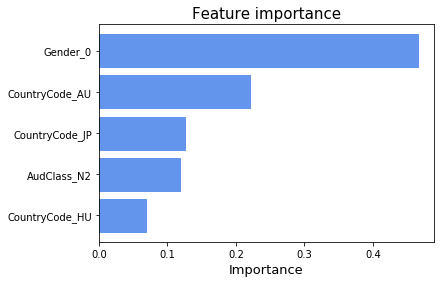

In [59]:
#now plot the sorted importance of the features 
x_ax = X_.columns[np.where(tr.feature_importances_ > 0)]
y_ax = tr.feature_importances_[np.where(tr.feature_importances_ > 0)]

unsorted_list = [(importance, feature) for feature, importance in 
                  zip(x_ax, y_ax)]
sorted_list = sorted(unsorted_list)
features_sorted = []
importance_sorted = []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance", fontsize=13)

plt.barh(features_sorted,importance_sorted, color="cornflowerblue", edgecolor='cornflowerblue')